# Experiments for remote buck and staff.compute servers

In [2]:
#import warnings
#warnings.filterwarnings("ignore")
from __future__ import print_function, division
%matplotlib inline
import time
import tqdm
from tqdm import tqdm_notebook as tqdm_notebook
from tqdm import trange
import logging
from collections import OrderedDict
logger = logging.getLogger(__name__)

# Your code goes here
import os
import subprocess
from pathlib import Path
import numpy as np
from numpy import testing
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns

from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, Normalizer

import metric_learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors.ball_tree import BallTree
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Shogun - Metric Learning
from shogun import LMNN as shogun_LMNN
from shogun import RealFeatures, MulticlassLabels
from sklearn.utils.validation import check_X_y, check_array

# POT imports
import ot
from ot.datasets import get_1D_gauss as gauss

# MML import 
from mml import wasserstein, transform, gml, ot_testing, datasets, helper

data_path = str(Path(os.getcwd())) + "/data/"
multiclass_path = str(Path(os.getcwd())) + "/results/multiclass/"
binary_path = str(Path(os.getcwd())) + "/results/binary/"
results_path = str(Path(os.getcwd()))+ "/results/"

def write_to_pickle(dataframe, name):
    dataframe.to_pickle(data_path + name + ".pickle")
def read_from_pickle(name): 
    return pd.read_pickle(data_path + name + ".pickle")

In [ ]:
import importlib
importlib.reload(wasserstein)
importlib.reload(gml)
importlib.reload(helper)

In [ ]:
# Load Hellinger representation of the data 
X,Y = datasets.load_mnist("Hellinger")

In [ ]:
print(data_path)

In [ ]:
# Representation so far is a matrix of row vectors each representing a digit..
# Let's make it the same way for Caltech - do you think it will hold in memory? 

## Print learned distances and objective functions - can I get the objective to act more nicely?

## Binary experiments 
- Print at least 5 experiments with different digits and their objective on the same plot
- Print for the Caltech dataset as well

## Multiclass experiments 
- Print 1 run of experiment 

*Currently using L1 in the metric nearness process*

In [2]:
gml17 = np.load(binary_path+"matrix17.npy")
obj17 = helper.load_json(binary_path+"objective17")

gml18 = np.load(binary_path+"matrix18.npy")
obj18 = helper.load_json(binary_path+"objective18")

gml19 = np.load(binary_path+"matrix19.npy")
obj19 = helper.load_json(binary_path+"objective19")


gml16 = np.load(binary_path+"matrix16.npy")
obj16 = helper.load_json(binary_path+"objective16")

gml15 = np.load(binary_path+"matrix15.npy")
obj15 = helper.load_json(binary_path+"objective15")

In [3]:
obj = helper.load_json(multiclass_path + "objective_mnist_sift_pullback_1")
gml_pullback = np.load(multiclass_path + "gml_mnist_sift_pullback_1.npy")

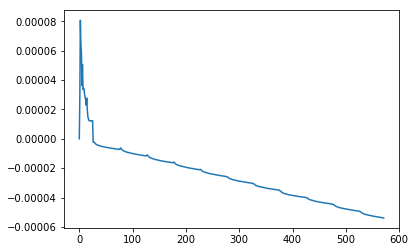

In [4]:
plt.plot(obj);

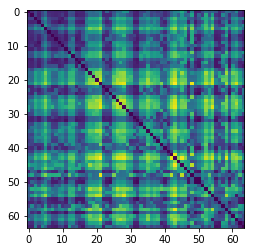

In [5]:
plt.imshow(gml_pullback)

In [3]:
gml_names = ["obj19","obj18","obj17","obj16","obj15"]

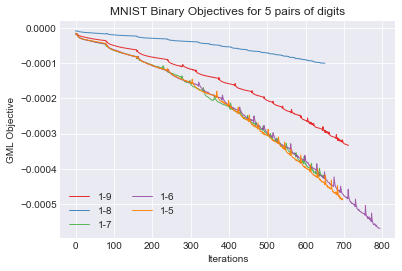

In [5]:
# Plot the accuracies in the same space
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')


gml_values = [obj19,obj18,obj17,obj16,obj15]
gml_names = ["1-9","1-8","1-7","1-6","1-5"]
num=0
for gml in gml_values:
    plt.plot(gml, marker='', color=palette(num), linewidth=1, alpha=0.9, label=gml_names[num])
    num+=1

plt.title("MNIST Binary Objectives for 5 pairs of digits")
plt.xlabel("Iterations")
plt.ylabel("GML Objective")

# Add legend
plt.legend(loc=0, ncol=2);
plt.savefig(results_path+"objectives_MNL1.jpg")
#_=plt.legend()

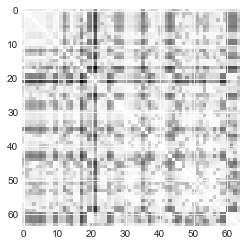

In [58]:
plt.imshow(gml15);

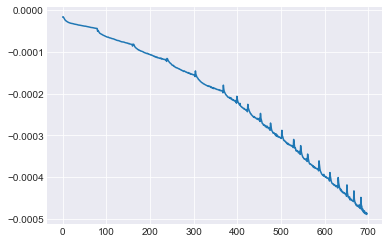

In [60]:
plt.plot(obj15);